In [28]:
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline
from pylab import plot, show, savefig, xlim, figure, \
                hold, ylim, legend, boxplot, setp, axes

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Concatenating citibike data for Feb and Aug, 2015
citibike_months = ['201502', '201508']
citibike_files = []
citibike_df = pd.DataFrame()
             
for month in citibike_months:
    citibike_path ='%s-citibike-tripdata.csv' % month
    citibike_frame = pd.read_csv(citibike_path)
    citibike_files.append(citibike_frame)
citibike_df = pd.concat(citibike_files, ignore_index=True)

citibike_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978,2
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993,1
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969,2
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985,2
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957,1


In [3]:
#Inserting weekday
citibike_df['weekday'] = pd.DatetimeIndex(citibike_df['starttime']).weekday

In [72]:
citibike_df = citibike_df[citibike_df['usertype'] == 'Subscriber']
citibike_df.reset_index()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,weekday,age
0,0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978,2,6,37
1,1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993,1,6,22
2,2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969,2,6,46
3,3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985,2,6,30
4,4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957,1,6,58
5,5,717,2/1/2015 0:02,2/1/2015 0:14,373,Willoughby Ave & Walworth St,40.693317,-73.953820,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,15854,Subscriber,1979,1,6,36
6,6,1306,2/1/2015 0:04,2/1/2015 0:26,352,W 56 St & 6 Ave,40.763406,-73.977225,504,1 Ave & E 15 St,40.732219,-73.981656,15173,Subscriber,1983,1,6,32
7,7,913,2/1/2015 0:04,2/1/2015 0:19,439,E 4 St & 2 Ave,40.726281,-73.989780,116,W 17 St & 8 Ave,40.741776,-74.001497,17862,Subscriber,1955,1,6,60
8,8,759,2/1/2015 0:04,2/1/2015 0:17,335,Washington Pl & Broadway,40.729039,-73.994046,2012,E 27 St & 1 Ave,40.739445,-73.976806,21183,Subscriber,1985,2,6,30
9,9,585,2/1/2015 0:05,2/1/2015 0:15,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,444,Broadway & W 24 St,40.742354,-73.989151,14843,Subscriber,1982,1,6,33


In [76]:
#Creating lists with ages of males and females for each day of the week
male = [[], [], [], [], [], [], []]
female = [[], [], [], [], [], [], []]

for i in citibike_df.index:
    if citibike_df['gender'][i] == 1:
        male[citibike_df['weekday'][i]].append(citibike_df['tripduration'][i])
    else:
        female[citibike_df['weekday'][i]].append(citibike_df['tripduration'][i])

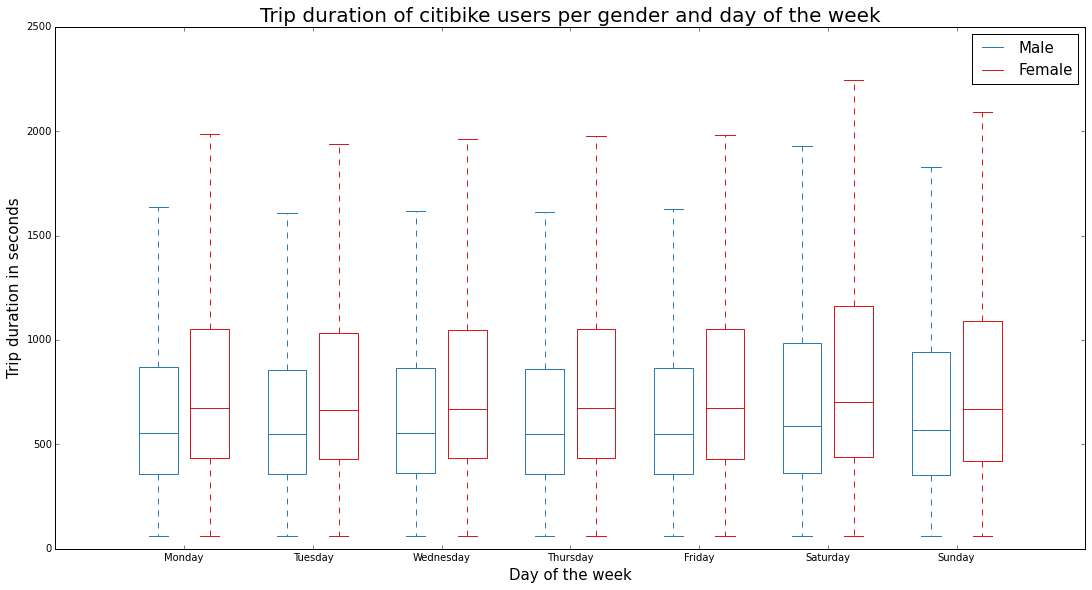

In [83]:
ticks = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure(figsize=(15, 8))
pl.title('Trip duration of citibike users per gender and day of the week', fontsize = 20)

fig_male = plt.boxplot(male, positions=np.array(xrange(len(male)))*2.0-0.4, sym='', widths=0.6)
fig_female = plt.boxplot(female, positions=np.array(xrange(len(female)))*2.0+0.4, sym='', widths=0.6)
set_box_color(fig_male, '#2C7BB6') # colors are from http://colorbrewer2.org/
set_box_color(fig_female, '#D7191C')

plt.plot([], c='#2C7BB6', label='Male')
plt.plot([], c='#D7191C', label='Female')
plt.legend(fontsize = 15)

plt.xticks(xrange(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.ylim(0, 2500)
plt.tight_layout()

pl.ylabel('Trip duration in seconds', fontsize = 15)
pl.xlabel('Day of the week', fontsize = 15)

In [75]:
male

[[], [], [], [], [], [], []]